#Trabalho: AULA 3 – MODELOS DE PROBABILIDADE (PROBIT E LOGIT)
Alunos:
- Guilherme Rafael Koch
- Brenno Gustavo Barbosa
- Ana Blanco

In [163]:
tickers <- c("USREC", "GS10",     # A taxa de juros de títulos de 10 anos
                    "TB3MS",     # A taxa de juros de títulos de 3 meses
                  "UNRATE",     # A taxa de desemprego
    "SAHMCURRENT"  # Indicador de recessões com base na taxa de desemprego
)

In [58]:
install.packages("quantmod")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [59]:
library(quantmod)

## 1) A inclinação da estrutura a termo da taxa de juros

In [164]:
dataset <- getSymbols(tickers, src='FRED', auto.assign=TRUE)

In [75]:
SLOPE <- GS10 - TB3MS

## 2) Vamos olhar para os dados

In [65]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### a. Faça um gráfico com a inclinação da curva de juros ao longo do tempo

In [66]:
library(ggplot2)

Don't know how to automatically pick scale for object of type <xts/zoo>.
Defaulting to continuous.


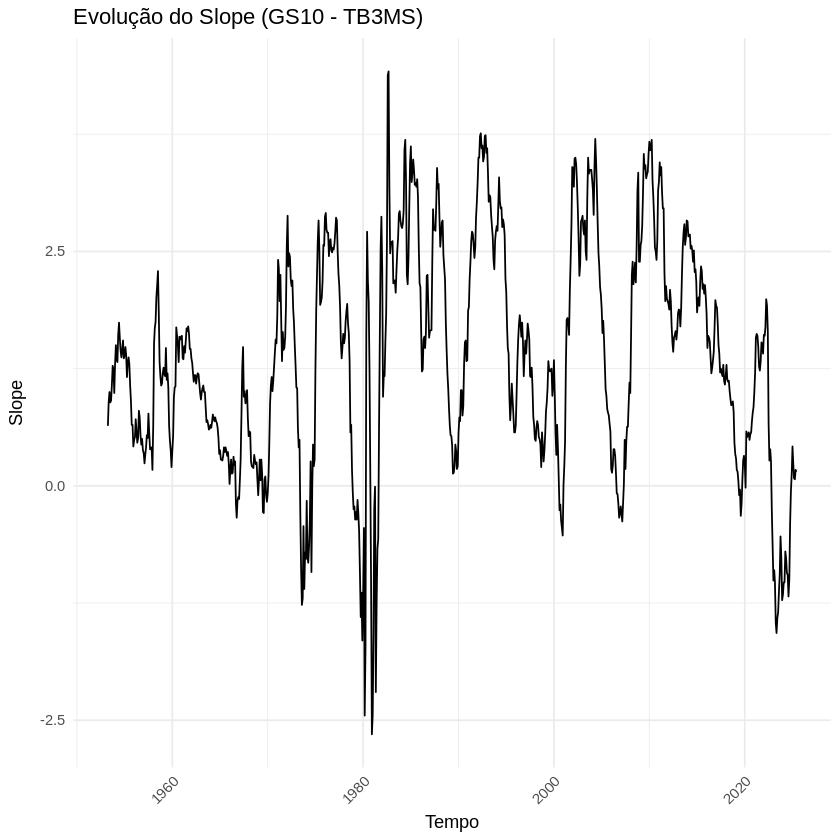

In [165]:
df_slope <- data.frame(Date = index(SLOPE), SLOPE = coredata(SLOPE))

ggplot(df_slope, aes(x = Date, y = SLOPE)) +
  geom_line() +
  theme_minimal() +
  labs(title = "Evolução do Slope (GS10 - TB3MS)",
       x = "Tempo",
       y = "Slope") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

### b. Faça um gráfico com a taxa de desemprego ao longo do tempo.

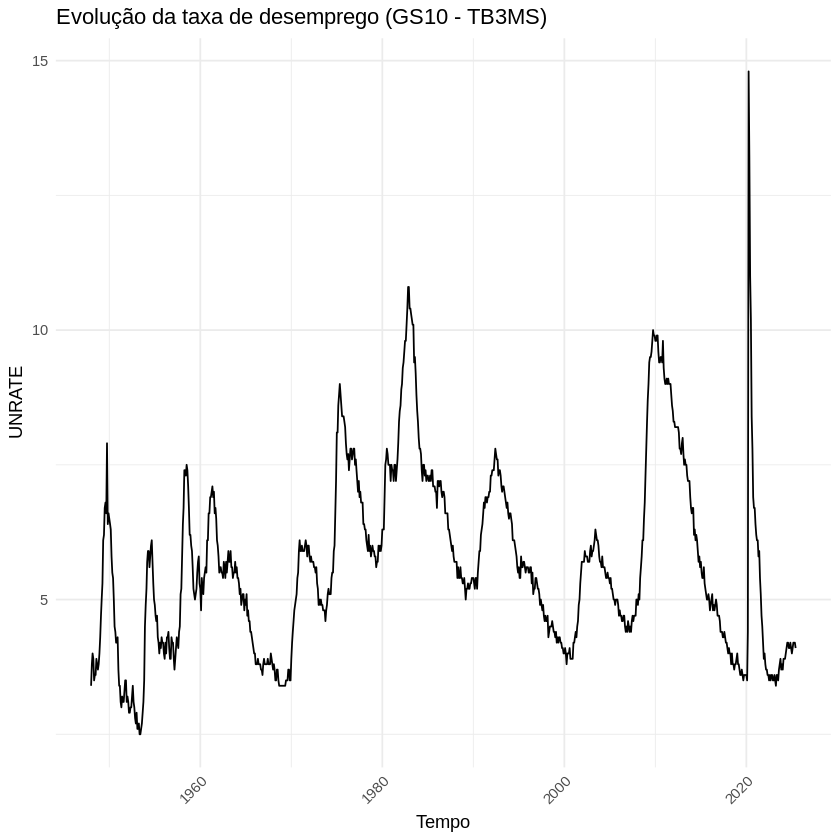

In [167]:
df_unrate <- data.frame(Date = index(UNRATE), UNRATE = coredata(UNRATE))

ggplot(df_unrate, aes(x = Date, y = UNRATE)) +
  geom_line() +
  theme_minimal() +
  labs(title = "Evolução da taxa de desemprego (GS10 - TB3MS)",
       x = "Tempo",
       y = "UNRATE") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

### c. [DESAFIO não-obrigatório]

In [168]:
recessions <- read.table(textConnection(
  "Peak, Trough
1857-06-01, 1858-12-01
1860-10-01, 1861-06-01
1865-04-01, 1867-12-01
1869-06-01, 1870-12-01
1873-10-01, 1879-03-01
1882-03-01, 1885-05-01
1887-03-01, 1888-04-01
1890-07-01, 1891-05-01
1893-01-01, 1894-06-01
1895-12-01, 1897-06-01
1899-06-01, 1900-12-01
1902-09-01, 1904-08-01
1907-05-01, 1908-06-01
1910-01-01, 1912-01-01
1913-01-01, 1914-12-01
1918-08-01, 1919-03-01
1920-01-01, 1921-07-01
1923-05-01, 1924-07-01
1926-10-01, 1927-11-01
1929-08-01, 1933-03-01
1937-05-01, 1938-06-01
1945-02-01, 1945-10-01
1948-11-01, 1949-10-01
1953-07-01, 1954-05-01
1957-08-01, 1958-04-01
1960-04-01, 1961-02-01
1969-12-01, 1970-11-01
1973-11-01, 1975-03-01
1980-01-01, 1980-07-01
1981-07-01, 1982-11-01
1990-07-01, 1991-03-01

2001-03-01, 2001-11-01
2007-12-01, 2009-06-01
2020-02-01, 2021-06-01"), sep=',',
  colClasses=c('Date', 'Date'), header=TRUE); rm(dataset, tickers)

In [118]:
slope <- data.frame(date=time(SLOPE), coredata(GS10-TB3MS))
rt <- subset(recessions, Peak >= min(slope$date))

In [120]:
p2    <- ggplot(slope) + geom_line(aes(x=date, y=GS10)) + theme_bw()+
  labs(x = "", y = "Inclinação da Curva",
       caption= "Fonte: FRED, NBER")

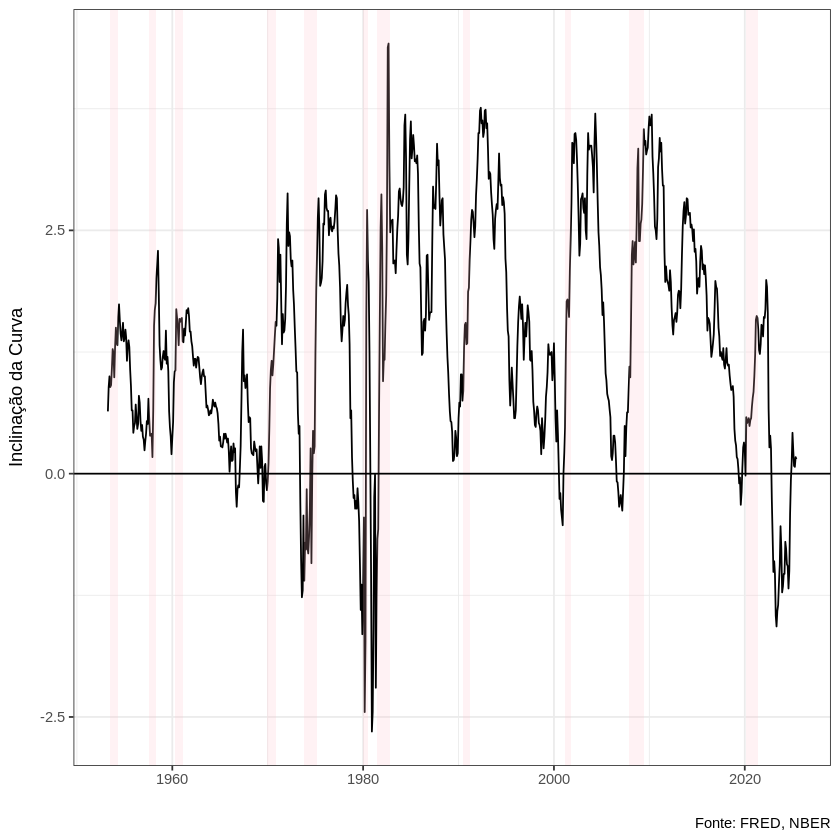

In [121]:
p2    <- p2 + geom_rect(data=rt, aes(xmin=Peak, xmax=Trough,
                                     ymin=-Inf, ymax=+Inf), fill='pink', alpha=0.2) + geom_hline(yintercept = 0)
p2

## 3) Descreva os gráficos.

Em geral, após a inversão da curva de juros — isto é, quando os juros de curto prazo (3 meses) superam os de longo prazo (10 anos), tornando a variável Slope negativa — observa-se, posteriormente, a ocorrência de uma recessão.

## 4) Vamos criar um ‘dataframe’.

In [85]:
data <- data.frame(
  window( USREC, start = "1960-01-01"),
  window( SLOPE, start = "1960-01-01"),
  window( SAHMCURRENT, start = "1960-01-01"),
  window( UNRATE, start = "1960-01-01")
)

In [86]:
colnames(data) <- c("USREC", "SLOPE", "SR", "U")

## 5) Primeira abordagem

### a. Faça uma regressão linear simples do o indicador de recessões do NBER na inclinação da curva de juros.

In [87]:
modelo_regressao <- lm(USREC ~ SLOPE, data = data)
summary(modelo_regressao)


Call:
lm(formula = USREC ~ SLOPE, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.1248 -0.1223 -0.1205 -0.1187  0.8856 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.118501   0.017511   6.767 2.57e-11 ***
SLOPE       0.001685   0.009320   0.181    0.857    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3264 on 784 degrees of freedom
Multiple R-squared:  4.168e-05,	Adjusted R-squared:  -0.001234 
F-statistic: 0.03268 on 1 and 784 DF,  p-value: 0.8566


### b. Faça uma regressão linear simples do o indicador de recessões do NBER na taxa de desemprego.

In [129]:
modelo_regressao_simples <- lm(USREC ~ SR, data = data)
summary(modelo_regressao_simples)


Call:
lm(formula = USREC ~ SR, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.06783 -0.09086 -0.07721 -0.06670  0.91964 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.07721    0.01203   6.417  2.4e-10 ***
SR           0.10505    0.01141   9.211  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.31 on 784 degrees of freedom
Multiple R-squared:  0.09764,	Adjusted R-squared:  0.09649 
F-statistic: 84.84 on 1 and 784 DF,  p-value: < 2.2e-16


### c. Faça uma regressão linear múltipla com as todas as variáveis.

In [100]:
modelo_regressao_multipla <- lm(USREC ~ SLOPE + SR + U, data = data)
summary(modelo_regressao_multipla)


Call:
lm(formula = USREC ~ SLOPE + SR + U, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.08140 -0.09984 -0.07840 -0.05890  0.91179 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.054919   0.046018   1.193    0.233    
SLOPE       -0.014893   0.010972  -1.357    0.175    
SR           0.100828   0.013590   7.419 3.07e-13 ***
U            0.007651   0.009316   0.821    0.412    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3101 on 782 degrees of freedom
Multiple R-squared:  0.09977,	Adjusted R-squared:  0.09631 
F-statistic: 28.89 on 3 and 782 DF,  p-value: < 2.2e-16


### d. Explique os resultados.

In [107]:
sr <- data.frame(date=time(SAHMCURRENT), coredata(SAHMCURRENT))
rt <- subset(recessions, Peak >= min(slope$date))

In [124]:
p3    <- ggplot(sr) + geom_line(aes(x=date, y=SAHMCURRENT)) + theme_bw()+
  labs(x = "", y = "Indicador de recessões com base na taxa de desemprego",
       caption= "Fonte: FRED, NBER")

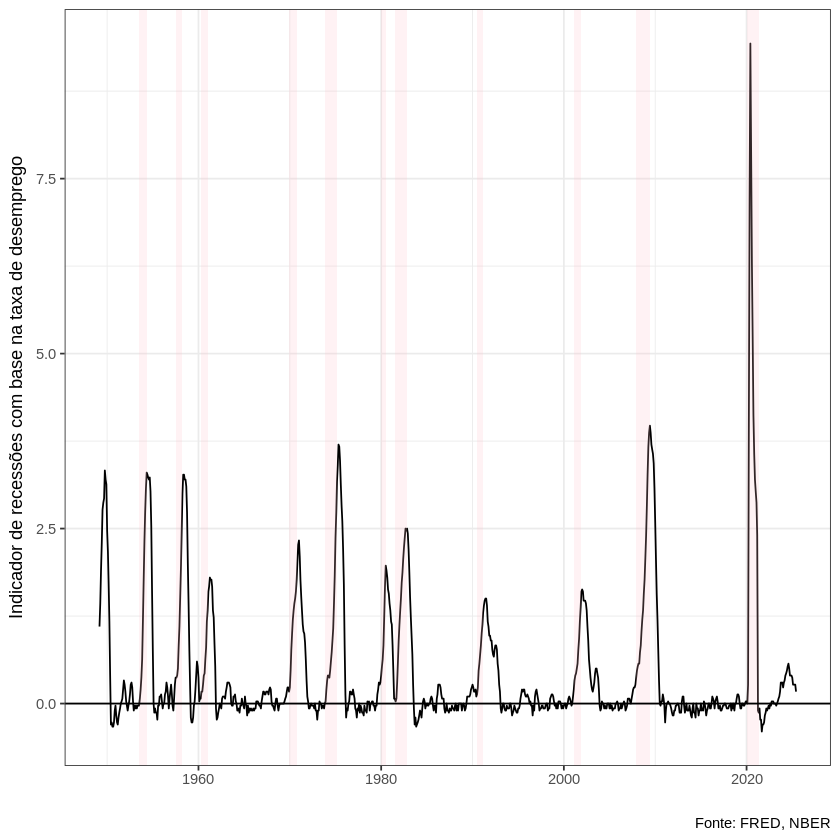

In [125]:
p3    <- p3 + geom_rect(data=rt, aes(xmin=Peak, xmax=Trough,
                                     ymin=-Inf, ymax=+Inf), fill='pink', alpha=0.2) + geom_hline(yintercept = 0)
p3

O indicador de recessão baseado na taxa de desemprego (SR) é o único preditor que apresentou significância estatística para a ocorrência de recessões nos EUA, enquanto a inclinação da curva de juros (SLOPE) e a taxa de desemprego (U) não foram estatisticamente significativas ao nível de 5%. Conforme observado no gráfico acima, sempre que o indicador SR ultrapassa determinado patamar, verifica-se a ocorrência de uma recessão em seguida.

## 6) Segunda abordagem (Probit).

In [126]:
library(stats)

### a. Faça uma regressão linear probit do o indicador de recessões do NBER na inclinação da curva de juros.

In [131]:
modelo_probit <- glm(USREC ~ SR, data = data, family = binomial(link = "probit"))
summary(modelo_probit)


Call:
glm(formula = USREC ~ SR, family = binomial(link = "probit"), 
    data = data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.41609    0.07017 -20.181  < 2e-16 ***
SR           0.37743    0.05619   6.718 1.85e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 579.51  on 785  degrees of freedom
Residual deviance: 520.88  on 784  degrees of freedom
AIC: 524.88

Number of Fisher Scoring iterations: 8


### b. Faça uma regressão probit do o indicador de recessões do NBER na taxa de desemprego.

In [132]:
modelo_probit <- glm(USREC ~ U, data = data, family = binomial(link = "probit"))
summary(modelo_probit)


Call:
glm(formula = USREC ~ U, family = binomial(link = "probit"), 
    data = data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.05396    0.21224  -9.677  < 2e-16 ***
U            0.14439    0.03267   4.419 9.92e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 579.51  on 785  degrees of freedom
Residual deviance: 560.38  on 784  degrees of freedom
AIC: 564.38

Number of Fisher Scoring iterations: 5


### c. Faça uma regressão probit múltipla com as todas as variáveis

In [133]:
modelo_probit <- glm(USREC ~ SLOPE + SR + U, data = data, family = binomial(link = "probit"))
summary(modelo_probit)


Call:
glm(formula = USREC ~ SLOPE + SR + U, family = binomial(link = "probit"), 
    data = data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.48864    0.24991  -5.957 2.58e-09 ***
SLOPE       -0.06949    0.05771  -1.204    0.229    
SR           0.36284    0.07064   5.137 2.80e-07 ***
U            0.02946    0.04939   0.597    0.551    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 579.51  on 785  degrees of freedom
Residual deviance: 519.36  on 782  degrees of freedom
AIC: 527.36

Number of Fisher Scoring iterations: 10


### d. Explique os resultados.

Tanto na regressão linear quanto no modelo probit, o índice construído a partir da taxa de desemprego (SR) se destaca como o principal preditor estatisticamente significativo da ocorrência de recessões, ao passo que as demais variáveis analisadas não apresentam significância estatística relevante.

## 7) Terceira abordagem (Logit)

### a. Faça uma regressão logit do o indicador de recessões do NBER na inclinação da curva de juros.

In [137]:
modelo_logit1 <- glm(USREC ~ SR, data = data, family = binomial(link = "logit"))
summary(modelo_logit)


Call:
glm(formula = USREC ~ SLOPE + SR + U, family = binomial(link = "logit"), 
    data = data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.56945    0.46889  -5.480 4.26e-08 ***
SLOPE       -0.13745    0.10627  -1.293    0.196    
SR           0.66260    0.12894   5.139 2.76e-07 ***
U            0.06061    0.09124   0.664    0.506    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 579.51  on 785  degrees of freedom
Residual deviance: 524.09  on 782  degrees of freedom
AIC: 532.09

Number of Fisher Scoring iterations: 5


### b. Faça uma regressão logit do o indicador de recessões do NBER na taxa de desemprego.

In [138]:
modelo_logit2 <- glm(USREC ~ U, data = data, family = binomial(link = "logit"))
summary(modelo_logit)


Call:
glm(formula = USREC ~ SLOPE + SR + U, family = binomial(link = "logit"), 
    data = data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.56945    0.46889  -5.480 4.26e-08 ***
SLOPE       -0.13745    0.10627  -1.293    0.196    
SR           0.66260    0.12894   5.139 2.76e-07 ***
U            0.06061    0.09124   0.664    0.506    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 579.51  on 785  degrees of freedom
Residual deviance: 524.09  on 782  degrees of freedom
AIC: 532.09

Number of Fisher Scoring iterations: 5


### c. Faça uma regressão logit múltipla com as todas as variáveis.

In [139]:
modelo_logit3 <- glm(USREC ~ SLOPE + SR + U, data = data, family = binomial(link = "logit"))
summary(modelo_logit)


Call:
glm(formula = USREC ~ SLOPE + SR + U, family = binomial(link = "logit"), 
    data = data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.56945    0.46889  -5.480 4.26e-08 ***
SLOPE       -0.13745    0.10627  -1.293    0.196    
SR           0.66260    0.12894   5.139 2.76e-07 ***
U            0.06061    0.09124   0.664    0.506    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 579.51  on 785  degrees of freedom
Residual deviance: 524.09  on 782  degrees of freedom
AIC: 532.09

Number of Fisher Scoring iterations: 5


In [145]:
anova(modelo_logit1, modelo_logit3, test = "Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,784,525.7329,NA,NA,NA
2,782,524.0863,2,1.646583,0.4389843


### d. Explique os resultados.

O teste de razão de verossimilhança (teste do qui-quadrado) para comparação dos modelos logit indica que a inclusão das variáveis adicionais no modelo mais complexo não resulta em uma melhora estatisticamente significativa do ajuste (p-valor = 0,44). Portanto, o modelo mais simples é suficiente para explicar os dados.

## 8) Probit: a estimativa.

In [146]:
library(dplyr)


######################### Warning from 'xts' package ##########################
#                                                                             #
# The dplyr lag() function breaks how base R's lag() function is supposed to  #
# work, which breaks lag(my_xts). Calls to lag(my_xts) that you type or       #
# source() into this session won't work correctly.                            #
#                                                                             #
# Use stats::lag() to make sure you're not using dplyr::lag(), or you can add #
# conflictRules('dplyr', exclude = 'lag') to your .Rprofile to stop           #
# dplyr from breaking base R's lag() function.                                #
#                                                                             #
# Code in packages is not affected. It's protected by R's namespace mechanism #
# Set `options(xts.warn_dplyr_breaks_lag = FALSE)` to suppress this warning.  #
#                                      

In [149]:
data <- data %>%
mutate( REC12 = dplyr::lead( as.numeric( USREC ),12 ) )

In [150]:
modelo_probit <- glm(REC12 ~ SR, data = data, family = binomial(link = "probit"))
summary(modelo_probit)


Call:
glm(formula = REC12 ~ SR, family = binomial(link = "probit"), 
    data = data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.16660    0.06437 -18.124   <2e-16 ***
SR          -0.13723    0.07974  -1.721   0.0853 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 544.14  on 773  degrees of freedom
Residual deviance: 540.91  on 772  degrees of freedom
  (12 observations deleted due to missingness)
AIC: 544.91

Number of Fisher Scoring iterations: 6


In [151]:
modelo_probit <- glm(REC12 ~ SR + U, data = data, family = binomial(link = "probit"))
summary(modelo_probit)


Call:
glm(formula = REC12 ~ SR + U, family = binomial(link = "probit"), 
    data = data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.13152    0.25656  -0.513    0.608    
SR           0.05215    0.08668   0.602    0.547    
U           -0.19640    0.04808  -4.085 4.41e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 544.14  on 773  degrees of freedom
Residual deviance: 522.89  on 771  degrees of freedom
  (12 observations deleted due to missingness)
AIC: 528.89

Number of Fisher Scoring iterations: 5


In [152]:
modelo_probit <- glm(REC12 ~ SR + U + SLOPE, data = data, family = binomial(link = "probit"))
summary(modelo_probit)


Call:
glm(formula = REC12 ~ SR + U + SLOPE, family = binomial(link = "probit"), 
    data = data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.93402    0.28282  -3.302 0.000958 ***
SR          -0.09418    0.09725  -0.968 0.332809    
U            0.05810    0.05801   1.001 0.316611    
SLOPE       -0.62143    0.07122  -8.726  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 544.14  on 773  degrees of freedom
Residual deviance: 427.75  on 770  degrees of freedom
  (12 observations deleted due to missingness)
AIC: 435.75

Number of Fisher Scoring iterations: 7


Ao incorporar uma defasagem de 12 meses para a variável dependente (lead), observa-se que a inclinação da curva de juros (SLOPE) se destaca como o principal preditor estatisticamente significativo para a antecipação de recessões nos Estados Unidos. O coeficiente negativo e altamente significativo indica que, quanto menor (ou mais invertida) a inclinação da curva, maior a probabilidade de ocorrência de recessão no horizonte de 12 meses. Por outro lado, o índice baseado na taxa de desemprego (SR) e a própria taxa de desemprego (U) não apresentaram significância estatística nesse contexto de previsão antecipada.

In [157]:
prob <- predict( modelo_probit, newdata = data.frame(SLOPE = 0.15, SR = 0.17, U = 4.1), type = "response")
round( prob, 4 )

1 
0.2104

In [154]:
tail(data)

,USREC,SLOPE,SR,U,REC12
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2025-01-01,0,0.42,0.37,4.0,NA
2025-02-01,0,0.23,0.27,4.1,NA
2025-03-01,0,0.08,0.27,4.2,NA
2025-04-01,0,0.07,0.27,4.2,NA
2025-05-01,0,0.17,0.27,4.2,NA
2025-06-01,0,0.15,0.17,4.1,NA


Diante dos parâmetros econômicos atuais, a probabilidade estimada de recessão nos próximos 12 meses é de aproximadamente 21%, de acordo com o modelo probit desenvolvido.

## 9) Probit:

In [172]:
data <- data %>%
mutate( REC6 = dplyr::lead( as.numeric( USREC ),6 ) )

In [173]:
modelo_probit <- glm(REC6 ~ SR, data = data, family = binomial(link = "probit"))
summary(modelo_probit)


Call:
glm(formula = REC6 ~ SR, family = binomial(link = "probit"), 
    data = data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.19057    0.06352 -18.744   <2e-16 ***
SR           0.02712    0.05740   0.472    0.637    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 570.01  on 779  degrees of freedom
Residual deviance: 569.82  on 778  degrees of freedom
  (6 observations deleted due to missingness)
AIC: 573.82

Number of Fisher Scoring iterations: 5


In [174]:
modelo_probit <- glm(REC6 ~ SR + U, data = data, family = binomial(link = "probit"))
summary(modelo_probit)


Call:
glm(formula = REC6 ~ SR + U, family = binomial(link = "probit"), 
    data = data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept) -0.52055    0.23853  -2.182  0.02909 * 
SR           0.14099    0.06811   2.070  0.03845 * 
U           -0.12514    0.04346  -2.879  0.00399 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 570.01  on 779  degrees of freedom
Residual deviance: 561.26  on 777  degrees of freedom
  (6 observations deleted due to missingness)
AIC: 567.26

Number of Fisher Scoring iterations: 5


In [176]:
modelo_probit <- glm(REC6 ~ SR + U + SLOPE, data = data, family = binomial(link = "probit"))
summary(modelo_probit)


Call:
glm(formula = REC6 ~ SR + U + SLOPE, family = binomial(link = "probit"), 
    data = data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.07825    0.25339  -4.255 2.09e-05 ***
SR           0.05029    0.07223   0.696    0.486    
U            0.05826    0.05117   1.139    0.255    
SLOPE       -0.42208    0.06055  -6.971 3.15e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 570.01  on 779  degrees of freedom
Residual deviance: 505.56  on 776  degrees of freedom
  (6 observations deleted due to missingness)
AIC: 513.56

Number of Fisher Scoring iterations: 6


In [177]:
prob <- predict( modelo_probit, newdata = data.frame(SLOPE = 0.15, SR = 0.17, U = 4.1), type = "response")
round( prob, 4 )

1 
0.1856

Diante dos parâmetros econômicos atuais, a probabilidade estimada de recessão nos próximos 6 meses é de aproximadamente 19%, de acordo com o modelo probit desenvolvido.